# CNN - Natural Scenes Image Classification

Kaggle Dataset: [Intel Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification)

## 1.0 Import Library

In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2.0 Exploring Data

In [2]:
for dirpath, dirnames, filenames in os.walk("/kaggle/input"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/kaggle/input'.
There are 3 directories and 0 images in '/kaggle/input/intel-image-classification'.
There are 1 directories and 0 images in '/kaggle/input/intel-image-classification/seg_train'.
There are 6 directories and 0 images in '/kaggle/input/intel-image-classification/seg_train/seg_train'.
There are 0 directories and 2512 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/mountain'.
There are 0 directories and 2382 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/street'.
There are 0 directories and 2191 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/buildings'.
There are 0 directories and 2274 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/sea'.
There are 0 directories and 2271 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/forest'.
There are 0 directories and 2404 images in '/kaggle/input/intel-image-classification/seg_

In [3]:
# Directory path
base_dir = '/kaggle/input/intel-image-classification'
train_dir = os.path.join(base_dir, 'seg_train', 'seg_train')
test_dir = os.path.join(base_dir, 'seg_test', 'seg_test')

# Training Directory Path
train_mountain_dir = os.path.join(train_dir, 'mountain')
train_street_dir = os.path.join(train_dir, 'street')
train_buildings_dir = os.path.join(train_dir, 'buildings')
train_sea_dir = os.path.join(train_dir, 'sea')
train_forest_dir = os.path.join(train_dir, 'forest')
train_glacier_dir = os.path.join(train_dir, 'glacier')

### 2.1 Visualise data

In [4]:
ncols = 4
nrows = 1
num_images = 4

def view_random_image(target_dir):
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)

    random_image = random.sample(os.listdir(target_dir), num_images)

    for i, img_path in enumerate(random_image):
        ax = plt.subplot(nrows, ncols, i + 1)
        ax.axis('off')

        img = mpimg.imread(os.path.join(target_dir, img_path))
        plt.imshow(img)
        plt.title(os.path.basename(target_dir))

    plt.show()

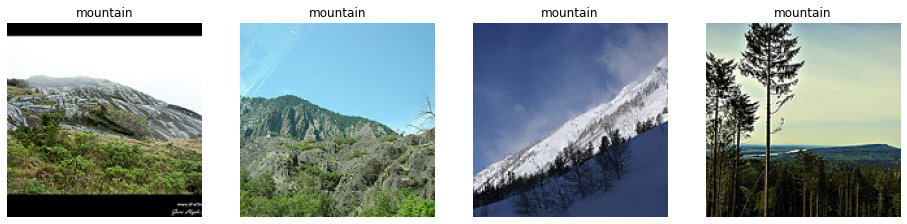

In [5]:
view_random_image(train_mountain_dir)

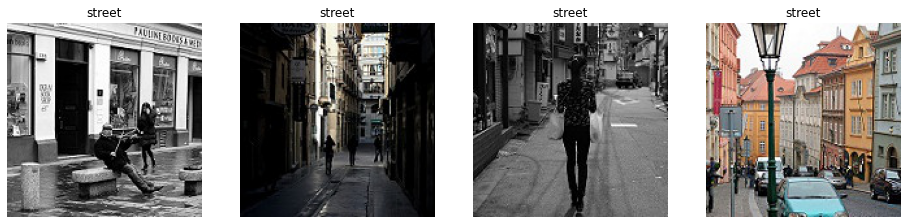

In [6]:
view_random_image(train_street_dir)

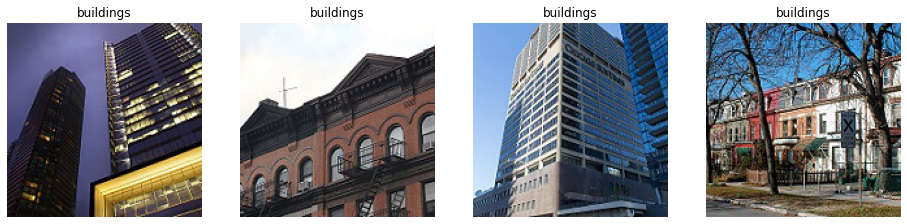

In [7]:
view_random_image(train_buildings_dir)

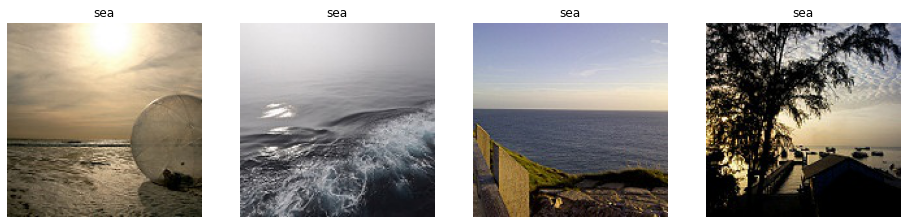

In [8]:
view_random_image(train_sea_dir)

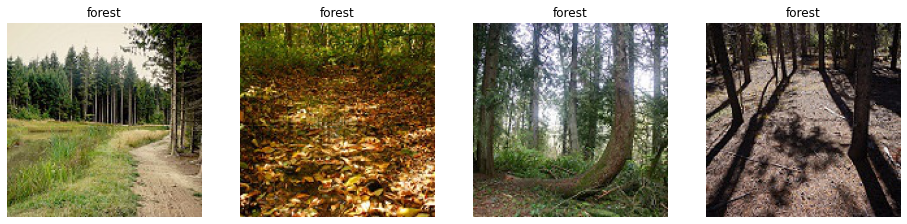

In [9]:
view_random_image(train_forest_dir)

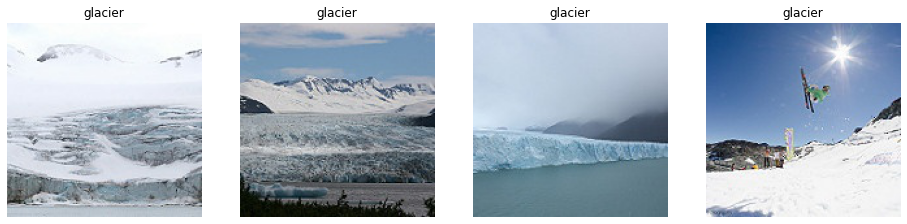

In [10]:
view_random_image(train_glacier_dir)

## 3.0 Preprocess Data

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_generator = train_datagen.flow_from_directory(test_dir,
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## 4.0 Building Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(6, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')

history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=64,
                    callbacks=[early_stopping])

Epoch 1/30
439/439 [==============================] - 227s 506ms/step - loss: 1.3128 - accuracy: 0.4669 - val_loss: 0.9280 - val_accuracy: 0.6440
Epoch 2/30
439/439 [==============================] - 135s 306ms/step - loss: 0.8921 - accuracy: 0.6622 - val_loss: 0.8595 - val_accuracy: 0.6836
Epoch 3/30
439/439 [==============================] - 133s 302ms/step - loss: 0.8030 - accuracy: 0.7074 - val_loss: 0.6925 - val_accuracy: 0.7563
Epoch 4/30
439/439 [==============================] - 128s 291ms/step - loss: 0.7151 - accuracy: 0.7370 - val_loss: 0.7164 - val_accuracy: 0.7393
Epoch 5/30
439/439 [==============================] - 138s 314ms/step - loss: 0.6868 - accuracy: 0.7500 - val_loss: 0.7233 - val_accuracy: 0.7432
Epoch 6/30
439/439 [==============================] - 129s 294ms/step - loss: 0.6474 - accuracy: 0.7668 - val_loss: 0.6522 - val_accuracy: 0.7627
Epoch 7/30
439/439 [==============================] - 134s 305ms/step - loss: 0.6053 - accuracy: 0.7843 - val_loss: 0.5669 -

## 5.0 Model Evaluation

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

      # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

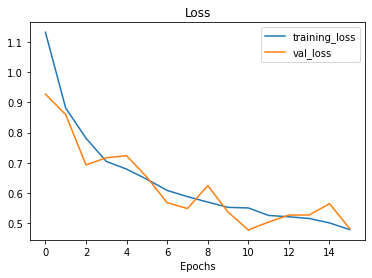

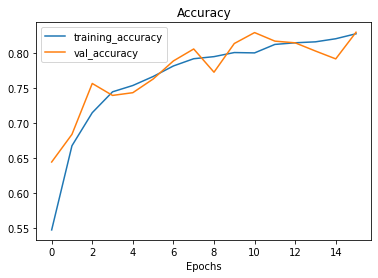

In [17]:
plot_loss_curves(history)

In conclusion, the model has an accuracy above 80% for both the training set and validation set respectively. This model has fairly good predictability.